In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data
mouse_drug_data = pd.read_csv(mouse_drug_data_to_load)
mouse_drug_data.head()

,Mouse ID,Drug
0,f234,Stelasyn
1,x402,Stelasyn
2,a492,Stelasyn
3,w540,Stelasyn
4,v764,Stelasyn


In [2]:
# Read the Clinical Trial Data
clinical_trial_data = pd.read_csv(clinical_trial_data_to_load)
clinical_trial_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [3]:
# Combine the data into a single dataset
# Display the data table for preview
merged_data = pd.merge(clinical_trial_data, mouse_drug_data, on="Mouse ID")
merged_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.000000,0,Capomulin
1,b128,5,45.651331,0,Capomulin
2,b128,10,43.270852,0,Capomulin
3,b128,15,43.784893,0,Capomulin
4,b128,20,42.731552,0,Capomulin


## Tumor Response to Treatment

In [4]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
drug_group = merged_data.groupby(["Drug", "Timepoint"])
drug_comparison_mean = round(drug_group[["Tumor Volume (mm3)"]].mean(),2)
drug_comparison_mean.head()

Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                       45.00
          5                       44.27
          10                      43.08
          15                      42.06
          20                      40.72

In [5]:
df_drug_timepoint = pd.DataFrame (drug_comparison_mean)
df_drug_timepoint.head()

Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                       45.00
          5                       44.27
          10                      43.08
          15                      42.06
          20                      40.72

In [6]:
df_drug_mean = df_drug_timepoint.reset_index()
df_drug_mean.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.00
1,Capomulin,5,44.27
2,Capomulin,10,43.08
3,Capomulin,15,42.06
4,Capomulin,20,40.72


In [7]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
drug_comparison_sem = drug_group[["Tumor Volume (mm3)"]].sem()
drug_comparison_sem.head()


Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                    0.000000
          5                    0.448593
          10                   0.702684
          15                   0.838617
          20                   0.909731

In [8]:
# Convert to DataFrame
df_drug_volume = pd.DataFrame (drug_comparison_sem)
df_drug_sem = df_drug_volume.reset_index()
df_drug_sem.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [9]:
# Minor Data Munging to Re-Format the Data Frames
mean_pivot_df = df_drug_mean.pivot(index = 'Timepoint', columns='Drug', values='Tumor Volume (mm3)')
mean_pivot_df

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.00,45.00,45.00,45.00,45.00,45.00,45.00,45.00,45.00,45.00
5,44.27,46.50,47.06,47.39,46.80,47.13,47.25,43.94,47.53,46.85
10,43.08,48.29,49.40,49.58,48.69,49.42,49.10,42.53,49.46,48.69
15,42.06,50.09,51.30,52.40,50.93,51.36,51.07,41.50,51.53,50.78
20,40.72,52.16,53.20,54.92,53.64,54.36,53.35,40.24,54.07,53.17
25,39.94,54.29,55.72,57.68,56.73,57.48,55.50,38.97,56.17,55.43
30,38.77,56.77,58.30,60.99,59.56,59.81,58.20,38.70,59.83,57.71
35,37.82,58.83,60.74,63.37,62.69,62.42,60.35,37.45,62.44,60.09
40,36.96,61.47,63.16,66.07,65.60,65.05,63.05,36.57,65.36,62.92


In [10]:
# Minor Data Munging to Re-Format the Data Frames
sem_pivot_df = df_drug_sem.pivot(index = 'Timepoint', columns='Drug', values='Tumor Volume (mm3)')
sem_pivot_df

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.448593,0.164505,0.235102,0.264819,0.202385,0.218091,0.231708,0.482955,0.239862,0.188950
10,0.702684,0.236144,0.282346,0.357421,0.319415,0.402064,0.376195,0.720225,0.433678,0.263949
15,0.838617,0.332053,0.357705,0.580268,0.444378,0.614461,0.466109,0.770432,0.493261,0.370544
20,0.909731,0.359482,0.476210,0.726484,0.595260,0.839609,0.555181,0.786199,0.621889,0.533182
25,0.881642,0.439356,0.550315,0.755413,0.813706,1.034872,0.577401,0.746991,0.741922,0.602513
30,0.934460,0.490620,0.631061,0.934121,0.975496,1.218231,0.746045,0.864906,0.899548,0.800043
35,1.052241,0.692248,0.984155,1.127867,1.013769,1.287481,1.084929,0.967433,1.003186,0.881426
40,1.223608,0.708505,1.055220,1.158449,1.118567,1.370634,1.564779,1.128445,1.410435,0.998515


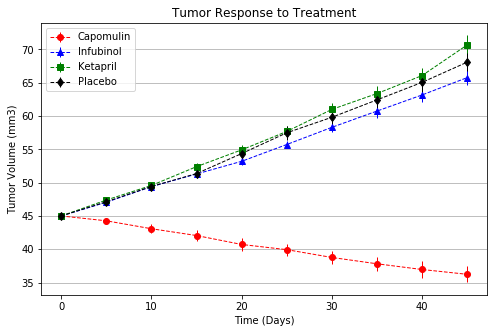

In [50]:
plt.figure(figsize = (8, 5))

# Generate the Plot 
capomulin = plt.errorbar(mean_pivot_df.index, mean_pivot_df["Capomulin"], yerr = sem_pivot_df["Capomulin"], color="red", marker = "o", linestyle="--", linewidth=1, label="Capomulin")
infubinol = plt.errorbar(mean_pivot_df.index, mean_pivot_df["Infubinol"], yerr = sem_pivot_df["Infubinol"], color="blue", marker = "^", linestyle="--", linewidth=1, label="Infubinol")
ketapril = plt.errorbar(mean_pivot_df.index, mean_pivot_df["Ketapril"], yerr = sem_pivot_df["Ketapril"], color="green", marker = "s", linestyle="--", linewidth=1, label="Ketapril") 
placebo = plt.errorbar(mean_pivot_df.index, mean_pivot_df["Placebo"], yerr = sem_pivot_df["Placebo"], color="black", marker = "d", linestyle="--", linewidth=1, label="Placebo")

# Add labels to X and Y axes :: Add title
plt.title("Tumor Response to Treatment")
plt.xlabel("Time (Days)")
plt.ylabel("Tumor Volume (mm3)")

# Add in a grid for the chart
plt.grid("off", which="major", axis="y")

# Create a legend for the chart
plt.legend(handles=[capomulin, infubinol, ketapril, placebo], loc="best")

# Save the Figure
plt.savefig("../Images/treatment.png")

# Show the Figure
plt.show()

## Metastatic Response to Treatment

In [12]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
drug_group = merged_data.groupby(["Drug", "Timepoint"])
drug_met_mean = round(drug_group[["Metastatic Sites"]].mean(),2)

# Convert to DataFrame
df_met_mean = pd.DataFrame (drug_met_mean)
df_met_mean.head()


Metastatic Sites
Drug      Timepoint                  
Capomulin 0                      0.00
          5                      0.16
          10                     0.32
          15                     0.38
          20                     0.65

In [13]:
#Reset index
df_met_mean_reset = df_met_mean.reset_index()
df_met_mean_reset.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.00
1,Capomulin,5,0.16
2,Capomulin,10,0.32
3,Capomulin,15,0.38
4,Capomulin,20,0.65


In [14]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
drug_group = merged_data.groupby(["Drug", "Timepoint"])
drug_met_sem = round(drug_group[["Metastatic Sites"]].sem(),2)

# Convert to DataFrame
df_met_sem = pd.DataFrame (drug_met_sem)
df_met_sem.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                      0.00
          5                      0.07
          10                     0.13
          15                     0.13
          20                     0.16

In [15]:
#Reset index
df_met_sem_reset = df_met_sem.reset_index()
df_met_sem_reset.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.00
1,Capomulin,5,0.07
2,Capomulin,10,0.13
3,Capomulin,15,0.13
4,Capomulin,20,0.16


In [16]:
# Minor Data Munging to Re-Format the Data Frames
mean_met_pivot_df = df_met_mean_reset.pivot(index = 'Timepoint', columns='Drug', values='Metastatic Sites')
mean_met_pivot_df.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
5,0.16,0.38,0.28,0.30,0.26,0.38,0.32,0.12,0.24,0.17
10,0.32,0.60,0.67,0.59,0.52,0.83,0.57,0.25,0.48,0.50
15,0.38,0.79,0.90,0.84,0.86,1.25,0.76,0.33,0.78,0.81
20,0.65,1.11,1.05,1.21,1.15,1.53,1.00,0.35,0.95,1.29


In [17]:
# Minor Data Munging to Re-Format the Data Frames
sem_met_pivot_df = df_met_sem_reset.pivot(index = 'Timepoint', columns='Drug', values='Metastatic Sites')
sem_met_pivot_df.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
5,0.07,0.11,0.09,0.10,0.09,0.10,0.10,0.07,0.09,0.08
10,0.13,0.15,0.16,0.14,0.16,0.12,0.11,0.09,0.12,0.11
15,0.13,0.18,0.19,0.19,0.16,0.19,0.14,0.12,0.15,0.11
20,0.16,0.24,0.23,0.24,0.18,0.23,0.17,0.12,0.20,0.17


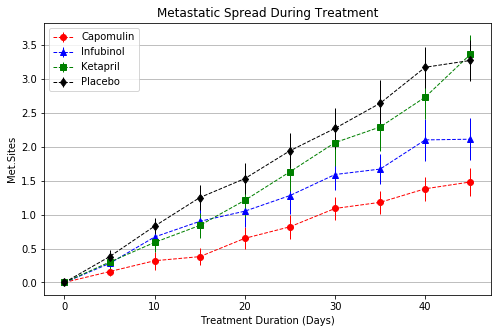

In [52]:
plt.figure(figsize = (8, 5))

# Generate the Plot (with Error Bars)
capomulin = plt.errorbar(mean_met_pivot_df.index, mean_met_pivot_df["Capomulin"], yerr = sem_met_pivot_df["Capomulin"], color="red", marker = "o", linestyle="--", linewidth=1, label="Capomulin")
infubinol = plt.errorbar(mean_met_pivot_df.index, mean_met_pivot_df["Infubinol"], yerr = sem_met_pivot_df["Infubinol"], color="blue", marker= "^", linestyle="--", linewidth=1, label="Infubinol")
ketapril = plt.errorbar(mean_met_pivot_df.index, mean_met_pivot_df["Ketapril"], yerr = sem_met_pivot_df["Ketapril"], color="green", marker="s", linestyle="--", linewidth=1, label="Ketapril")
placebo = plt.errorbar(mean_met_pivot_df.index, mean_met_pivot_df["Placebo"], yerr = sem_met_pivot_df["Placebo"], color="black", marker="d", linestyle="--", linewidth=1, label="Placebo")

# Add labels to X and Y axes :: Add title
plt.title("Metastatic Spread During Treatment")
plt.xlabel("Treatment Duration (Days)")
plt.ylabel("Met.Sites")

# Add in a grid for the chart
plt.grid("off", which="major", axis="y" )

# Create a legend for the chart
plt.legend(handles=[capomulin, infubinol, ketapril, placebo], loc="best")

# Save the Figure
plt.savefig("../Images/spread.png")

# Show the Figure
plt.show()

## Survival Rates

In [19]:
# Store the Count of Mice Grouped by Drug and Timepoint 
drug_group = merged_data.groupby(["Drug", "Timepoint"])
mouse_count = drug_group[["Mouse ID"]].count()
mouse_count.head()

# Convert to DataFrame
df_mouse_count = pd.DataFrame (mouse_count)
df_mouse_count.head()

# Preview DataFrame
df_mouse_count_reset = df_mouse_count.reset_index()
df_mouse_count_reset.head()


,Drug,Timepoint,Mouse ID
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [20]:
#Rename columns
df_mouse_count_reset = df_mouse_count_reset.rename(columns={"Mouse ID": "Mouse Count"
                                         })
df_mouse_count_reset.head()

,Drug,Timepoint,Mouse Count
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [21]:
df_mouse_count_reset['Mouse Count'] = pd.to_numeric(df_mouse_count_reset['Mouse Count'])
df_mouse_count_reset.head()

,Drug,Timepoint,Mouse Count
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [22]:
# Minor Data Munging to Re-Format the Data Frames
mouse_count_pivot_df = df_mouse_count_reset.pivot (index = 'Timepoint', columns='Drug', values='Mouse Count')
mouse_count_pivot_df

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17
25,22,18,18,19,18,17,14,23,19,16
30,22,16,17,18,15,15,13,23,18,15
35,22,14,12,17,15,14,10,21,16,14
40,21,14,10,15,15,12,9,20,12,14


In [53]:
starting_mice = mouse_count_pivot_df.iloc[0]
starting_mice

Drug
Capomulin    25
Ceftamin     25
Infubinol    25
Ketapril     25
Naftisol     25
Placebo      25
Propriva     26
Ramicane     25
Stelasyn     26
Zoniferol    25
Name: 0, dtype: int64

In [54]:
percentages = mouse_count_pivot_df / starting_mice * 100
percentages

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,100.0,100.0,100.0,100.0,100.0,100.0,100.000000,100.0,100.000000,100.0
5,100.0,84.0,100.0,92.0,92.0,96.0,96.153846,100.0,96.153846,96.0
10,100.0,80.0,84.0,88.0,84.0,96.0,88.461538,96.0,88.461538,88.0
15,96.0,76.0,84.0,76.0,84.0,80.0,65.384615,96.0,88.461538,84.0
20,92.0,72.0,80.0,76.0,80.0,76.0,65.384615,92.0,80.769231,68.0
25,88.0,72.0,72.0,76.0,72.0,68.0,53.846154,92.0,73.076923,64.0
30,88.0,64.0,68.0,72.0,60.0,60.0,50.000000,92.0,69.230769,60.0
35,88.0,56.0,48.0,68.0,60.0,56.0,38.461538,84.0,61.538462,56.0
40,84.0,56.0,40.0,60.0,60.0,48.0,34.615385,80.0,46.153846,56.0


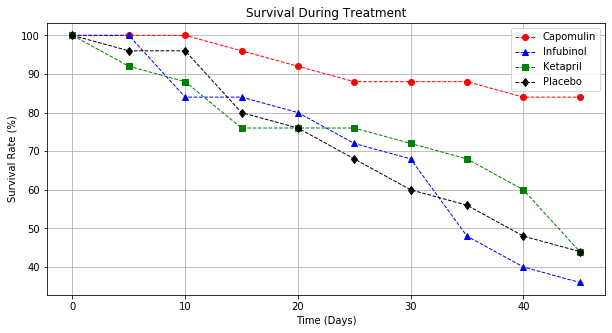

In [58]:
plt.figure(figsize = (10, 5))

#Plot the graph
capomulin = plt.plot(percentages.index, percentages["Capomulin"], color="red", marker = "o", linestyle="--",linewidth=1, label="Capomulin")
infubinol = plt.plot(percentages.index, percentages["Infubinol"], color="blue", marker = "^", linestyle="--",linewidth=1, label="Infubinol")
ketapril = plt.plot(percentages.index, percentages["Ketapril"], color="green", marker = "s", linestyle="--",linewidth=1, label="Ketapril")
placebo = plt.plot(percentages.index, percentages["Placebo"], color="black", marker = "d", linestyle="--",linewidth=1, label="Placebo")

# Add labels to X and Y axes :: Add title
plt.title("Survival During Treatment")
plt.xlabel("Time (Days)")
plt.ylabel("Survival Rate (%)")

# Add in a grid for the chart
plt.grid()

# Create a legend for the chart
plt.legend()

#Save the Figure
plt.savefig("../Images/survival.png")

# Show the Figure
plt.show()

## Summary Bar Graph

In [60]:
# Calculate the percent changes for each drug
percent_change = (mean_pivot_df.iloc[9] - mean_pivot_df.iloc[0]) / mean_pivot_df.iloc[0] * 100

# Display the data to confirm
percent_change

Drug
Capomulin   -19.466667
Ceftamin     42.511111
Infubinol    46.133333
Ketapril     57.022222
Naftisol     53.933333
Placebo      51.288889
Propriva     47.244444
Ramicane    -22.311111
Stelasyn     52.088889
Zoniferol    46.577778
dtype: float64

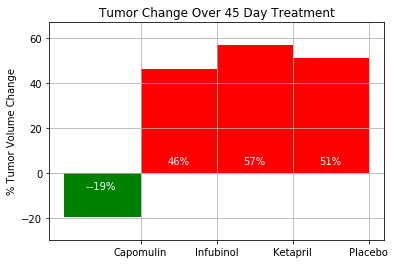

In [64]:
# Store all Relevant Percent Changes into a Tuple
percent_change_select = (percent_change["Capomulin"], percent_change["Infubinol"], percent_change["Ketapril"], percent_change["Placebo"])

# Splice the data between passing and failing drugs
fig, ax = plt.subplots()

#Define x axis
x_axis = np.arange(len(percent_change_tuple))
passed_drug = ax.bar(x_axis[0], percent_change_select[0], width =1, color='green')
failed_drug = ax.bar(x_axis[1:], percent_change_select[1:], width=1, color='red')

# Orient widths. Add labels, tick marks, etc. 
ax.grid()
ax.set_title("Tumor Change Over 45 Day Treatment")
ax.set_ylabel("% Tumor Volume Change")
ax.set_xticks(x_axis + 0.5)
ax.set_xticklabels(("Capomulin", "Infubinol", "Ketapril", "Placebo"))
ax.set_ylim([min(percent_change_select)-10,max(percent_change_select)+10])

# Use functions to label the percentages of changes
def autolabelFail(drug):
    for i in drug:
        height = i.get_height()
        ax.text(i.get_x() + i.get_width()/2., 3,
                '%d%%' % int(height),
                ha='center', va='bottom', color="w")

def autolabelPass(drug):
    for i in drug:
        height = i.get_height()
        ax.text(i.get_x() + i.get_width()/2., -8,
                '-%d%% ' % int(height),
                ha='center', va='bottom', color="w")

# Call functions to implement the function calls
autolabelPass(passed_drug)
autolabelFail(failed_drug)

# Save the Figure
fig.savefig("../Images/change.png")

# Show the Figure
fig.show()